<a href="https://colab.research.google.com/github/shivani-nandani/rumor-spread/blob/main/facebook_network_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random as rd

In [2]:
facebook = pd.read_csv('/content/facebook_combined.txt.gz', compression='gzip', sep=' ', names=['start_node', 'end_node'])
facebook

start_node  end_node
0               0         1
1               0         2
2               0         3
3               0         4
4               0         5
...           ...       ...
88229        4026      4030
88230        4027      4031
88231        4027      4032
88232        4027      4038
88233        4031      4038

[88234 rows x 2 columns]

* The graph is created from the `facebook` dataframe of the edges:

In [3]:
G = nx.from_pandas_edgelist(facebook, 'start_node', 'end_node')

## Visualizing the graph

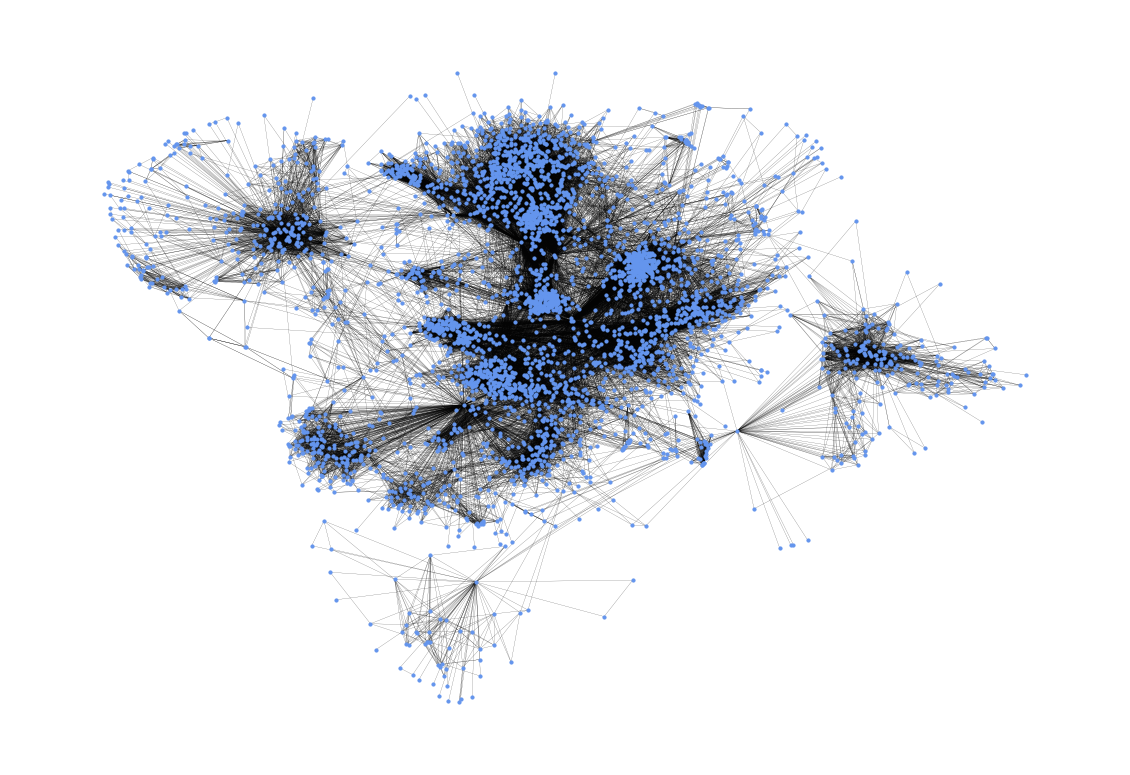

In [ ]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(20, 14))
ax.axis('off')
nx.draw_networkx(G, pos=pos, ax=ax, node_size=10, with_labels=False, width=0.15, node_color='cornflowerblue')

# Trust in SIR

In [ ]:
sir_color = dict()
sir_color['ignorant'] = 'limegreen'
sir_color['spreader'] = 'red'
sir_color['stifler'] = 'purple'
sir_color

{'ignorant': 'limegreen', 'spreader': 'red', 'stifler': 'purple'}

In [ ]:
N = G.number_of_nodes()   # population

# ignorant to spreader
alpha = 0.6  # untrusted neighbours (0<alpha<1)
lambda_ = 0.8  # infection rate when a uninfected node contacts an infected trusted neighbour
beta = 0.6  # factor to infection rate when a uninfected node contacts an infected untrused neighbour (0<beta<1)

# spreader to stifler
sigma = 0.1  # rate at which a spreader becomes a stifler when the spreader contacts a spreader or a stifler
delta = 0.7  # stifling rate (forgetting or disinclination), no contact needed

start = 0
end = 10
dt = 0.01
t = np.arange(start, end, dt)
n = int((end-start)/dt)

In [ ]:
color_map = np.empty(N).astype(str)

color_map[:] = sir_color['ignorant']
color_map[rd.randint(0,N-1)] = sir_color['spreader']

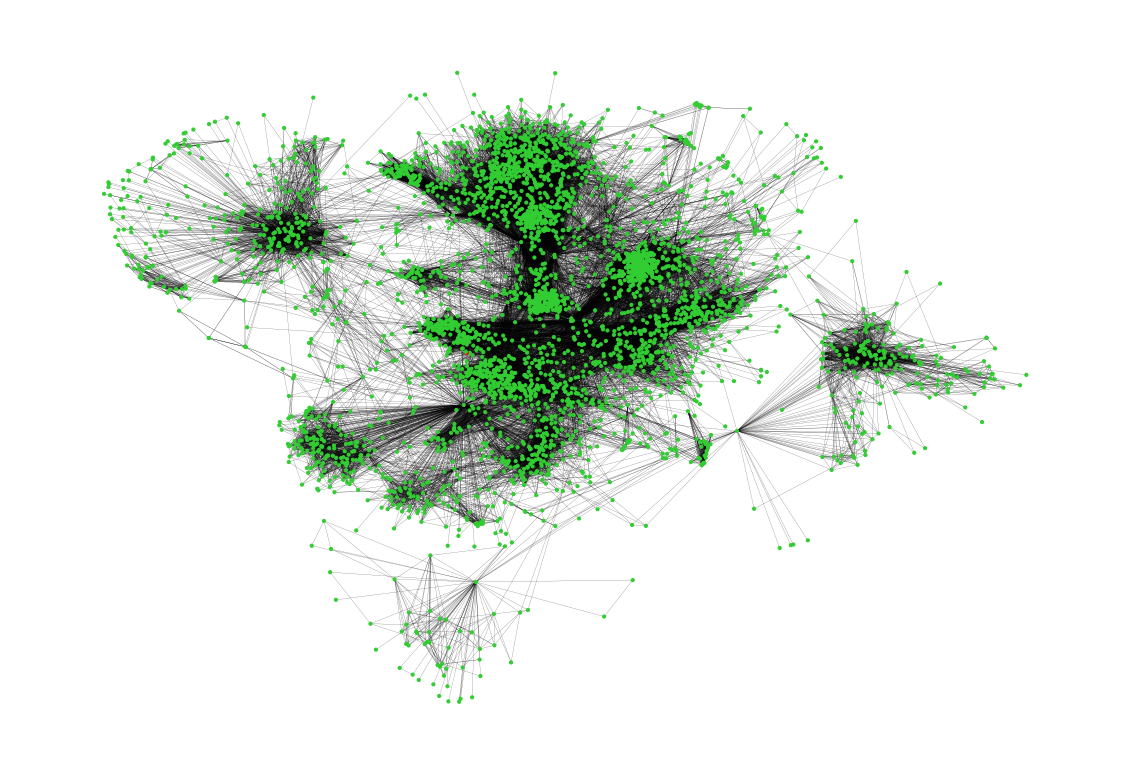

In [ ]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(20, 14))
ax.axis('off')
nx.draw_networkx(G, pos=pos, ax=ax, node_size=10, with_labels=False, width=0.15, node_color=color_map)

In [ ]:
for t in range(1, n):
  for i in range(1,G.number_of_nodes()):
    prob = rd.random()
    # ignorant contacts a spreader
    if (color_map[i] == sir_color['ignorant']) and (sir_color['spreader'] in [color_map[j] for j in [n for n in G.neighbors(i)]]):
      trust = rd.random()
      if trust < alpha:
        # spreader is untrusted
        if prob < beta*lambda_:
          color_map[i] = sir_color['spreader']
      else:
        # spreader is trusted
        if prob < lambda_:
          color_map[i] = sir_color['spreader']

    elif (color_map[i] == sir_color['spreader']):
      # spreader contacts another spreader or stifler
      if (sir_color['spreader'] in [color_map[j] for j in [n for n in G.neighbors(i)]]) or (sir_color['stifler'] in [color_map[j] for j in [n for n in G.neighbors(i)]]):
        if prob < sigma:
          color_map[i] = sir_color['stifler']
      else:
        # no contact (forgetting or disinclination)
        if prob < delta:
          color_map[i] = sir_color['stifler']

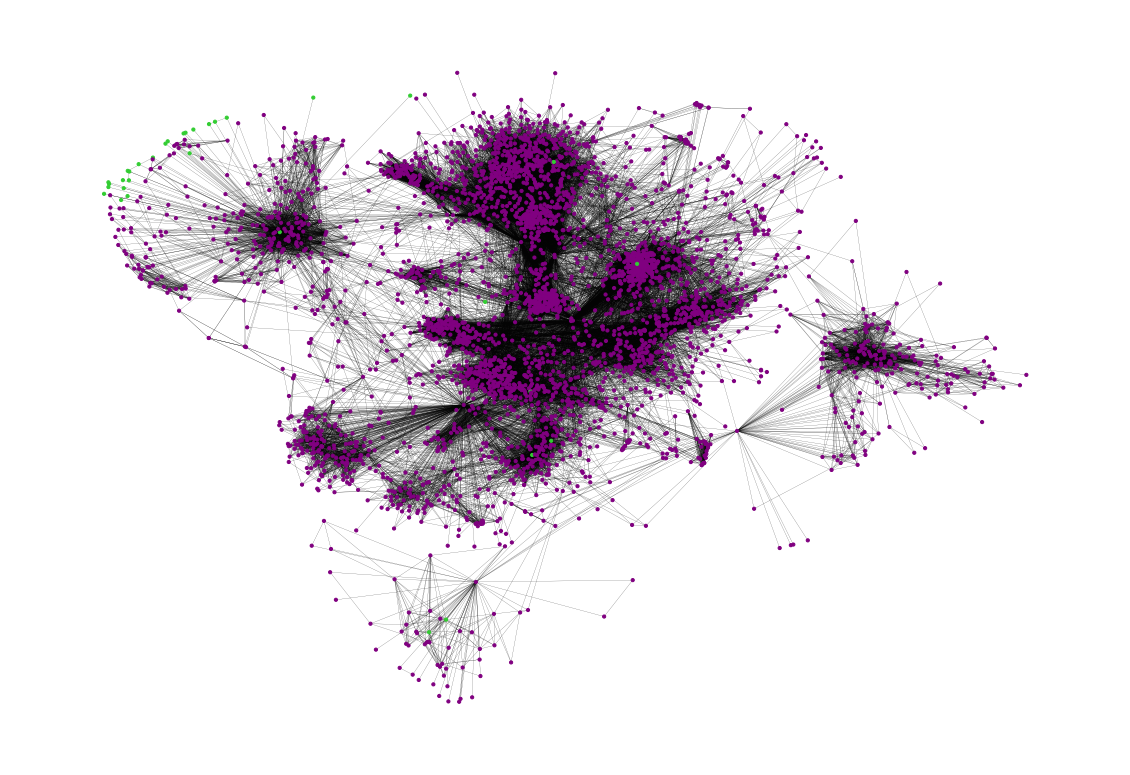

In [ ]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(20, 14))
ax.axis('off')
nx.draw_networkx(G, pos=pos, ax=ax, node_size=10, with_labels=False, width=0.15, node_color=color_map)

In [ ]:
num_ignorant = 0
num_spreader = 0
num_stifler = 0
for i in range(G.number_of_nodes()):
    num_ignorant += sum([sir_color['ignorant']==color_map[i]])
    num_spreader += sum([sir_color['spreader']==color_map[i]])
    num_stifler += sum([sir_color['stifler']==color_map[i]])
    
print('Fraction Ignorant = ', num_ignorant/N)
print('Fraction Spreader = ', num_spreader/N)
print('Fraction Stifler = ', num_stifler/N)

Fraction Ignorant =  0.008170339192869523
Fraction Spreader =  0.0
Fraction Stifler =  0.9918296608071305


# SIHR

In [ ]:
sihr_color = dict()
sihr_color['s'] = 'limegreen'   # susceptible = ignorant 
sihr_color['i'] = 'red'         # infected = spreader 
sihr_color['h'] = 'blue'        # hibernated
sihr_color['r'] = 'purple'      # recoverd = stifler 
sihr_color

{'h': 'blue', 'i': 'red', 'r': 'purple', 's': 'limegreen'}

In [ ]:
N = G.number_of_nodes() # population

# probabilities
lamb=0.8
beta = 0.2
delta = 0.6
epsilon = 0.5
eta = 0.5
alpha = 0.3

start = 0
end = 10
dt = 0.01
t = np.arange(start, end, dt)
n = int((end-start)/dt)

In [ ]:
color_map = np.empty(N).astype(str)

color_map[1:] = sihr_color['s']
color_map[0] = sihr_color['i']

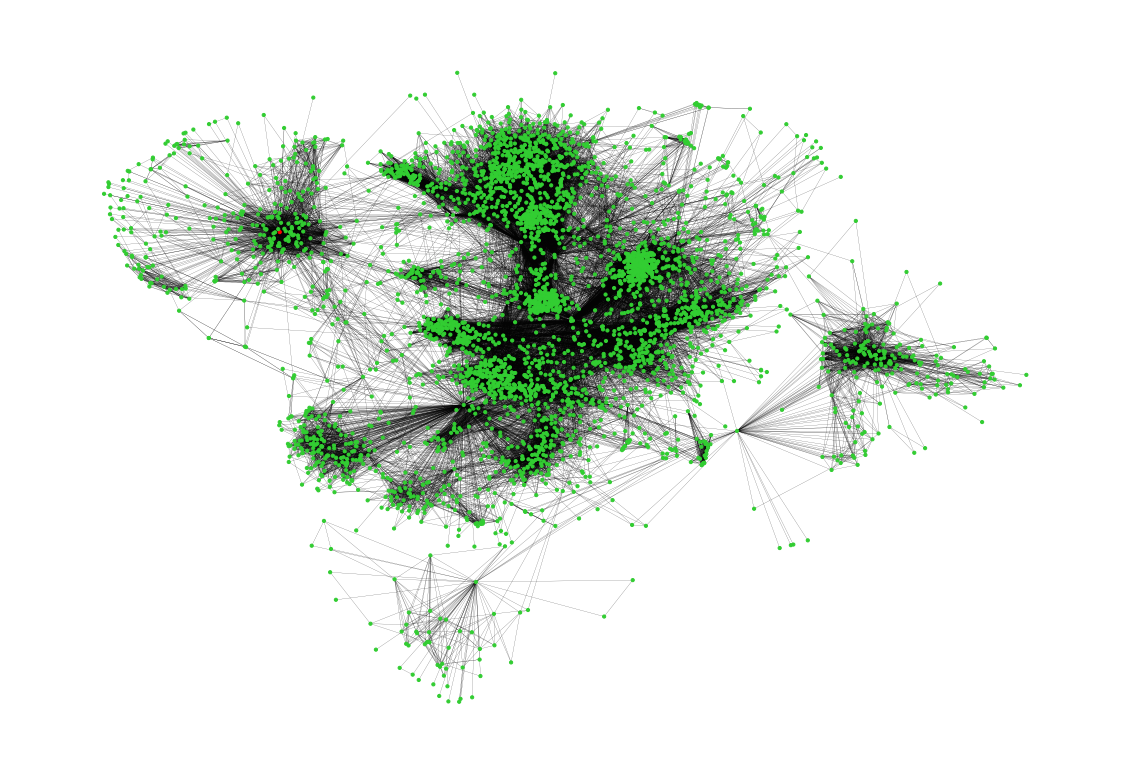

In [ ]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(20, 14))
ax.axis('off')
nx.draw_networkx(G, pos=pos, ax=ax, node_size=10, with_labels=False, width=0.15, node_color=color_map)

In [ ]:
for t in range(1, n):
    for i in range(G.number_of_nodes()):
        # forgetting mechanism
        forget =  rd.random()
        if color_map[i] == sihr_color['i']:
            if forget < delta:
                color_map[i] = sihr_color['h']
                continue
        # remembering mechanism
        remember = rd.random()
        if color_map[i] == sihr_color['h']:
            if remember < epsilon:
                color_map[i] = sihr_color['i']
                continue
        rand_num = rd.random()
        # if node is susceptible and at least one neighboring node is infected
        if color_map[i] == sihr_color['s'] and sihr_color['i'] in [color_map[j] for j in [n for n in G.neighbors(i)]]:
            if rand_num < beta:
                color_map[i] = sihr_color['r']
            elif rand_num < lamb:
                color_map[i] = sihr_color['i']
        # if node is infected and at least one neighboring node is infected or hibernated or recovered 
        elif color_map[i] == sihr_color['i'] and (sihr_color['i'] in [color_map[j] for j in [n for n in G.neighbors(i)]] or 
                                                  sihr_color['h'] in [color_map[j] for j in [n for n in G.neighbors(i)]] or
                                                  sihr_color['r'] in [color_map[j] for j in [n for n in G.neighbors(i)]]):
            if rand_num < alpha:
                color_map[i] = sihr_color['r']
        # if node is hibernated and at least one neighboring node is infected 
        elif color_map[i] == sihr_color['h'] and sihr_color['i'] in [color_map[j] for j in [n for n in G.neighbors(i)]]:
            if rand_num < eta:
                color_map[i] = sihr_color['i']
                

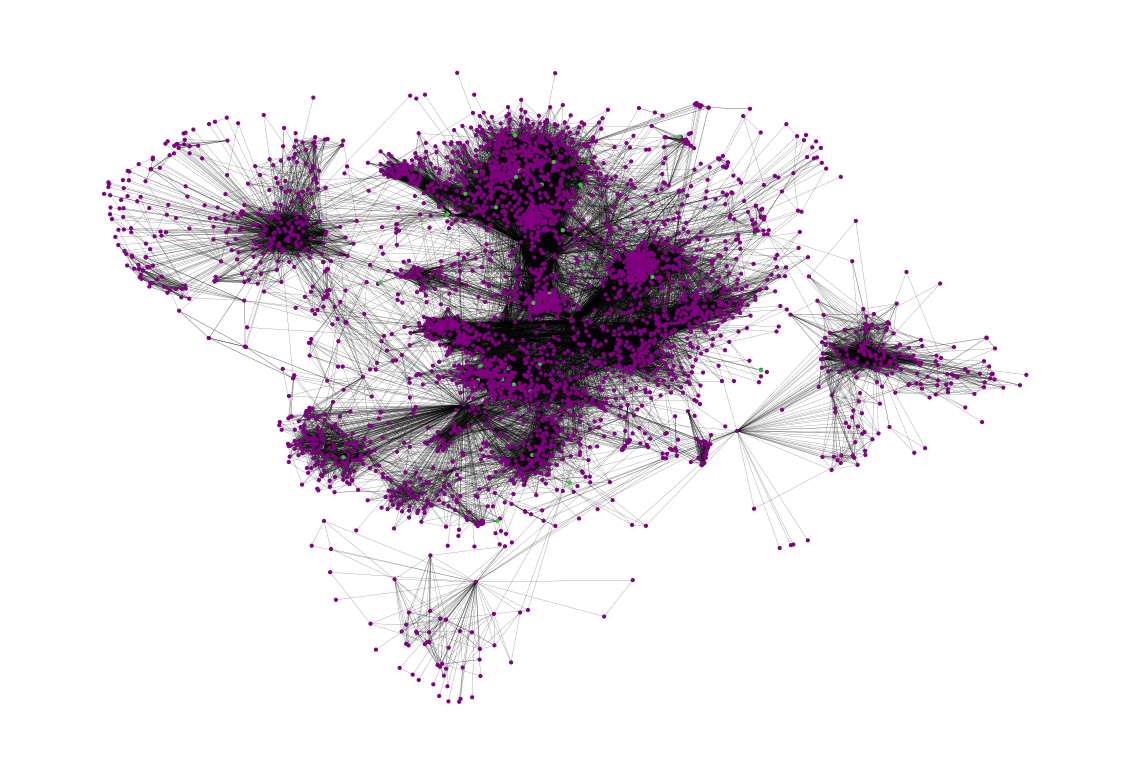

In [ ]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(20, 14))
ax.axis('off')
nx.draw_networkx(G, pos=pos, ax=ax, node_size=10, with_labels=False, width=0.15, node_color=color_map)

In [ ]:
num_s = 0
num_i = 0
num_h = 0
num_r = 0
for i in range(G.number_of_nodes()):
    num_s += sum([sihr_color['s']==color_map[i]])
    num_i += sum([sihr_color['i']==color_map[i]])
    num_h += sum([sihr_color['h']==color_map[i]])
    num_r += sum([sihr_color['r']==color_map[i]])
    
print('Fraction Susceptible = ', num_s/N)
print('Fraction Infective = ', num_i/N)
print('Fraction Hibernated = ', num_h/N)
print('Fraction Recovered = ', num_r/N)

Fraction Susceptible =  0.009903441445902451
Fraction Infective =  0.0
Fraction Hibernated =  0.0
Fraction Recovered =  0.9900965585540975


# SICR model

In [4]:
sicr_color = dict()
sicr_color['s'] = 'limegreen'
sicr_color['i'] = 'red'
sicr_color['c'] = 'blue'
sicr_color['r'] = 'purple'
sicr_color

{'c': 'blue', 'i': 'red', 'r': 'purple', 's': 'limegreen'}

In [5]:
N = G.number_of_nodes() # population

# probabilities
alpha = 0.7  
beta = 0.4
theta = 0.2
gamma = 0.5 
eta = 0.8

# time
start = 0
end = 10
dt = 0.01
t = np.arange(start, end, dt)
n = int((end-start)/dt)

In [11]:
color_map = np.empty(N).astype(str)

color_map[1:] = sicr_color['s']
color_map[0] = sicr_color['i']

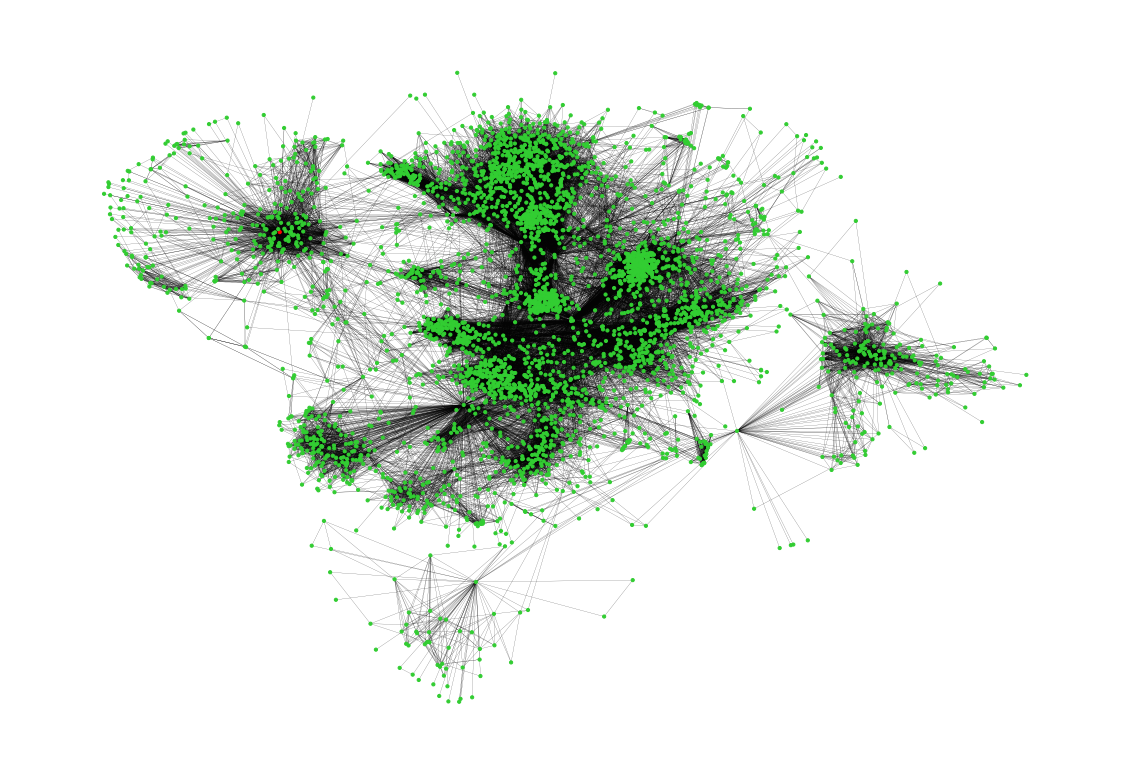

In [7]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(20, 14))
ax.axis('off')
nx.draw_networkx(G, pos=pos, ax=ax, node_size=10, with_labels=False, width=0.15, node_color=color_map)

In [12]:
for t in range(1, n):
    for i in range(N):
        rand_num = rd.random()
        # if node is susceptible and at least one neighboring node is infected
        if color_map[i] == sicr_color['s'] and sicr_color['i'] in [color_map[j] for j in [n for n in G.neighbors(i)]]:
            path = rd.randint(0,2)
            # s -> i
            if path == 0:
                if rand_num < alpha:
                    color_map[i] = sicr_color['i']
            # s -> c
            elif path == 1: 
                if rand_num < theta:
                    color_map[i] = sicr_color['c']
            # s -> r
            else:
                if rand_num < beta:
                    color_map[i] = sicr_color['r']
        # if node is infected and at least one neighboring node is infected
        elif color_map[i] == sicr_color['i'] and sicr_color['i'] in [color_map[j] for j in [n for n in G.neighbors(i)]]:
            if rand_num < gamma:
                color_map[i] = sicr_color['r']
        # if node is counterattack and at least one neighboring nodes is infected
        elif color_map[i] == sicr_color['c'] and sicr_color['i'] in [color_map[j] for j in [n for n in G.neighbors(i)]]:
            if rand_num < eta:
                for n in G.neighbors(i):
                    if color_map[n] == sicr_color['i']:
                        color_map[n] = sicr_color['r']

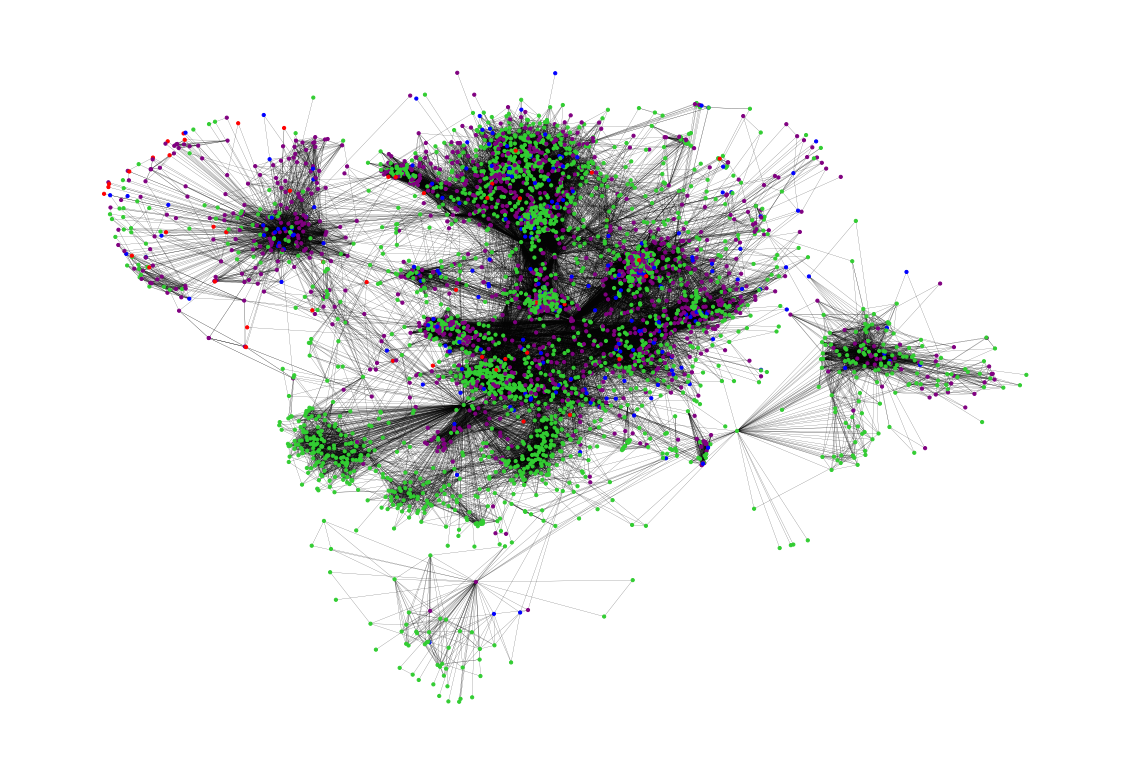

In [13]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(20, 14))
ax.axis('off')
nx.draw_networkx(G, pos=pos, ax=ax, node_size=10, with_labels=False, width=0.15, node_color=color_map)

In [14]:
num_s = 0
num_i = 0
num_c = 0
num_r = 0
for i in range(G.number_of_nodes()):
    num_s += sum([sicr_color['s']==color_map[i]])
    num_i += sum([sicr_color['i']==color_map[i]])
    num_c += sum([sicr_color['c']==color_map[i]])
    num_r += sum([sicr_color['r']==color_map[i]])
    
print('Fraction Susceptible = ', num_s/N)
print('Fraction Infective = ', num_i/N)
print('Fraction Counterattack = ', num_c/N)
print('Fraction Refractory = ', num_r/N)

Fraction Susceptible =  0.5954444169348849
Fraction Infective =  0.012379301807378064
Fraction Counterattack =  0.059173062639267145
Fraction Refractory =  0.33300321861846993


# SIHCR with Trust

- alpha: probability that S mistrusts I (mistrust probability)
- beta: factor to gamma (untrustworthy neighbor) (mistrust factor)
- gamma: probability that S becomes I when S contacts I (spreading rate)
- theta: prob that S becomes C when S contacts I (refuting rate)
- eta: prob that S becomes R when S contacts I (ignoring rate)
- delta: prob that I becomes R when I contacts I, H, R (stifling rate)
- xi: prob that I becomes R when C contacts I 
(persuading rate)
- pi: prob that I becomes H (indepedent)
(forgetting rate)
- mu: prob that H becomes I (independent)
(spontaneous remembering rate)
- omega: prob that H becomes I when H contacts I
(wakened remembering rate)

In [ ]:
sihcr_color = dict()
sihcr_color['s'] = 'limegreen'
sihcr_color['i'] = 'red'
sihcr_color['h'] = 'gold'
sihcr_color['c'] = 'blue'
sihcr_color['r'] = 'purple'
sihcr_color

{'c': 'blue', 'h': 'gold', 'i': 'red', 'r': 'purple', 's': 'limegreen'}

In [ ]:
# population
N = G.number_of_nodes() 

# probabilities
alpha = 0.6
beta = 0.8
gamma = 0.7
theta = 0.2
eta = 0.4
delta = 0.5
xi = 0.8
pi = 0.6
mu = 0.5
omega = 0.3

# time
start = 0
end = 10
dt = 0.01
t = np.arange(start, end, dt)
n = int((end-start)/dt)

In [ ]:
color_map = np.empty(N).astype(str)

color_map[:] = sihcr_color['s']
color_map[rd.randint(0,N-1)] = sihcr_color['i']

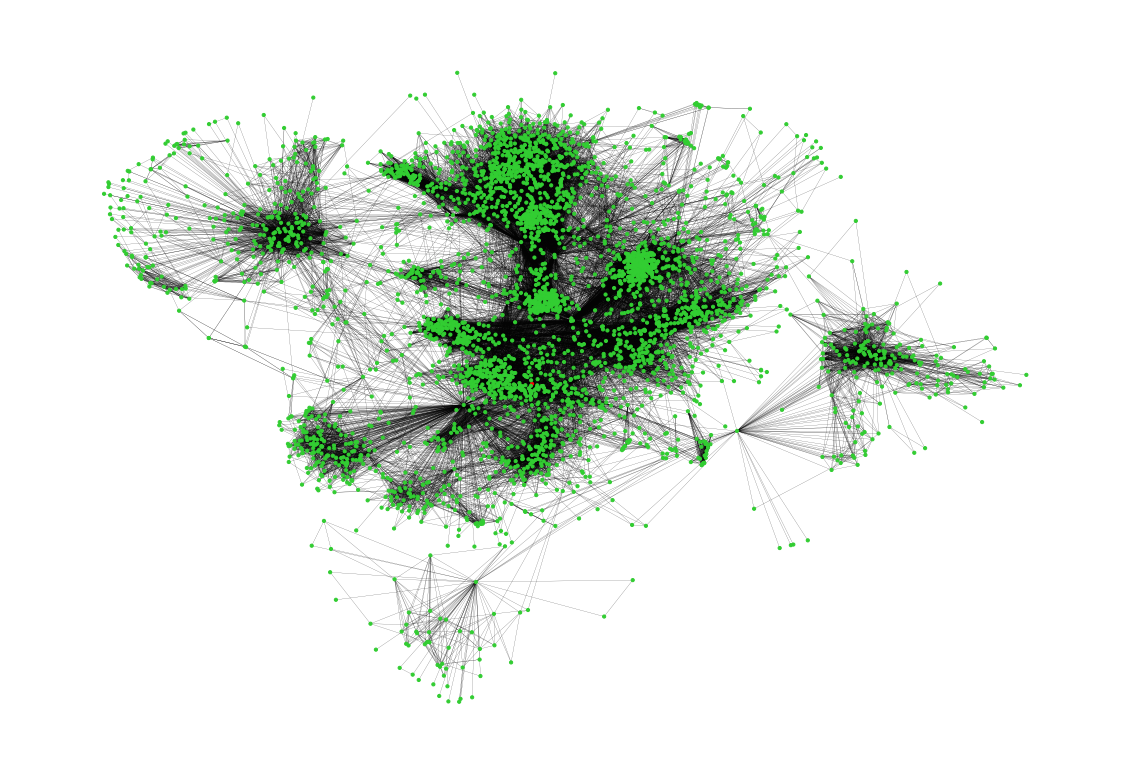

In [ ]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(20, 14))
ax.axis('off')
nx.draw_networkx(G, pos=pos, ax=ax, node_size=10, with_labels=False, width=0.15, node_color=color_map)

In [ ]:
for t in range(1, n):
    for i in range(G.number_of_nodes()):
        
        # forgetting mechanism
        forget = rd.random()
        if color_map[i] == sihcr_color['i']:
            if forget < pi:
                color_map[i] = sihcr_color['h']
                continue

        # remembering mechanism
        remember = rd.random()
        if color_map[i] == sihcr_color['h']:
            if remember < mu:
                color_map[i] = sihcr_color['i']
                continue
        
        prob = rd.random()

        # if node is susceptible and at least one neighboring node is infected
        if color_map[i] == sihcr_color['s'] and sihcr_color['i'] in [color_map[j] for j in [n for n in G.neighbors(i)]]:
            trust = rd.random()
            path = rd.randint(0,2)
            # s -> i
            if path == 0:
                if trust < alpha:   # not trusted
                    if prob < beta*gamma:
                        color_map[i] = sihcr_color['i']
                else:               # trusted 
                    if prob < gamma:
                        color_map[i] = sihcr_color['i']
            # s -> c
            elif path == 1:
                if trust < alpha:   # not trusted
                    if prob < theta:
                        color_map[i] = sihcr_color['c']
                else:               # trusted 
                    if prob < beta*theta:
                        color_map[i] = sihcr_color['c']
            # s -> r
            else:
                if trust < alpha:   # not trusted
                    if prob < eta:
                        color_map[i] = sihcr_color['r']
                else:               # trusted 
                    if prob < beta*eta:
                        color_map[i] = sihcr_color['r']
            
        # if node is infected and at least one neighboring node is infected or hibernated or recovered 
        elif color_map[i] == sihcr_color['i'] and (sihcr_color['i'] in [color_map[j] for j in [n for n in G.neighbors(i)]] or
                                                   sihcr_color['h'] in [color_map[j] for j in [n for n in G.neighbors(i)]] or
                                                   sihcr_color['r'] in [color_map[j] for j in [n for n in G.neighbors(i)]]):
            if prob < delta:
                color_map[i] = sihcr_color['r']

        # if node is counterattack and at least one neighboring nodes is infected
        elif color_map[i] == sihcr_color['c'] and sihcr_color['i'] in [color_map[j] for j in [n for n in G.neighbors(i)]]:
            if prob < xi:
                for n in G.neighbors(i):
                    if color_map[n] == sihcr_color['i']:
                        color_map[n] = sihcr_color['r']
        
        # if node is hibernated and at least one neighboring node is infected
        elif color_map[i] == sihcr_color['h'] and sihcr_color['i'] in [color_map[j] for j in [n for n in G.neighbors(i)]]:
            if prob < omega:
                color_map[i] = sihcr_color['i']

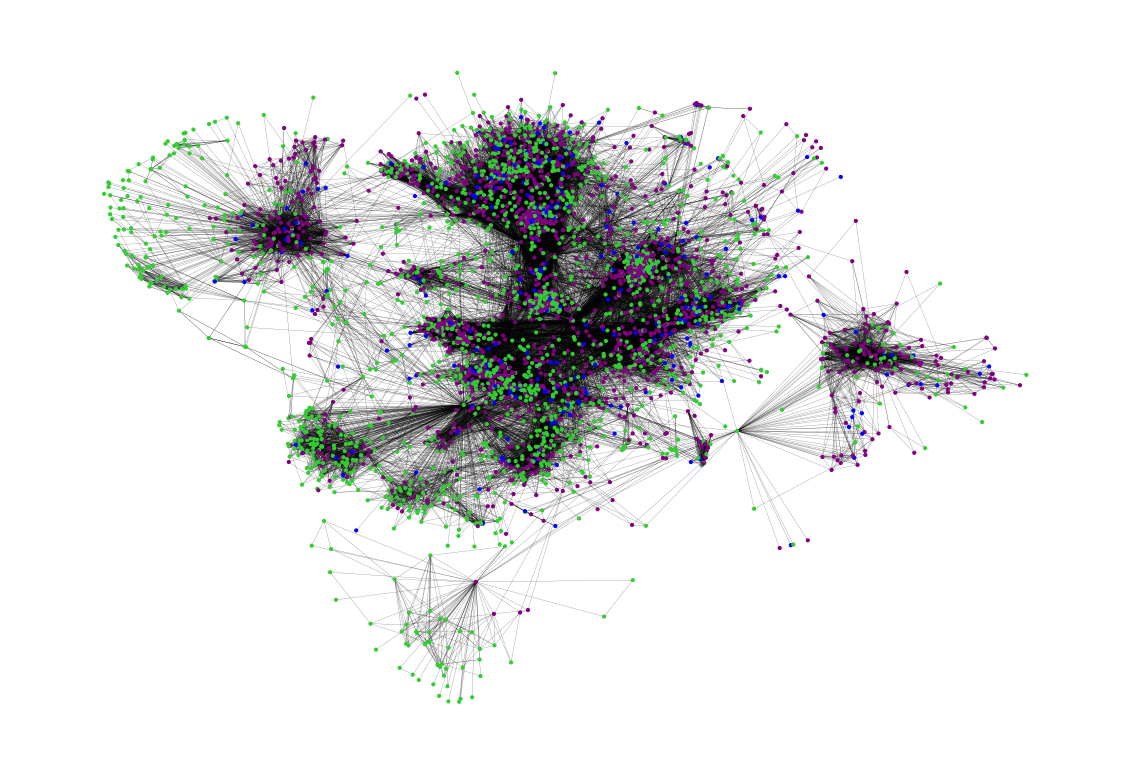

In [ ]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(20, 14))
ax.axis('off')
nx.draw_networkx(G, pos=pos, ax=ax, node_size=10, with_labels=False, width=0.15, node_color=color_map)

In [ ]:
num_s = 0
num_i = 0
num_h = 0
num_c = 0
num_r = 0
for i in range(G.number_of_nodes()):
    num_s += sum([sihcr_color['s']==color_map[i]])
    num_i += sum([sihcr_color['i']==color_map[i]])
    num_h += sum([sihcr_color['h']==color_map[i]])
    num_c += sum([sihcr_color['c']==color_map[i]])
    num_r += sum([sihcr_color['r']==color_map[i]])
    
print('Fraction Susceptible = ', num_s/N)
print('Fraction Infective = ', num_i/N)
print('Fraction Hibernated = ', num_h/N)
print('Fraction Counterattack = ', num_c/N)
print('Fraction Refractory = ', num_r/N)

Fraction Susceptible =  0.48427828670462986
Fraction Infective =  0.0
Fraction Hibernated =  0.0
Fraction Counterattack =  0.07774201535033425
Fraction Refractory =  0.4379796979450359
